In [ ]:
#Kết nối Drive với ggcolab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import Flatten, MaxPooling2D
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from keras.layers import Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [ ]:
batch_size = 1
img_size = (150, 150)
img_path = '/content/drive/MyDrive/khuôn mặt/train'

In [ ]:
image_generator = ImageDataGenerator(
    rescale = 1./255,
    brightness_range = (0.8, 1.2),
    zoom_range= (0.9, 1.2),
    validation_split= 0.2)
train_dataset= image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'training')
validation_dataset = image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,  
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'validation')

Found 23 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [ ]:
train_dataset.classes
print(train_dataset.class_indices)

{'chánh': 0, 'messi': 1}


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(512, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                        

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss ='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_dataset,batch_size=65,epochs=20,validation_data=validation_dataset)

Epoch 1/20
23/23 [==============================] - 23s 457ms/step - loss: 0.7993 - accuracy: 0.5652 - val_loss: 0.6761 - val_accuracy: 1.0000
Epoch 2/20
23/23 [==============================] - 2s 87ms/step - loss: 0.1869 - accuracy: 0.9565 - val_loss: 0.7028 - val_accuracy: 0.2500
Epoch 3/20
23/23 [==============================] - 2s 85ms/step - loss: 0.0617 - accuracy: 1.0000 - val_loss: 0.8221 - val_accuracy: 0.2500
Epoch 4/20
23/23 [==============================] - 2s 89ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 0.9400 - val_accuracy: 0.2500
Epoch 5/20
23/23 [==============================] - 2s 84ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.0439 - val_accuracy: 0.2500
Epoch 6/20
23/23 [==============================] - 2s 88ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.1341 - val_accuracy: 0.2500
Epoch 7/20
23/23 [==============================] - 2s 86ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.2024 - val_accuracy: 0.2500
Epoch 8/20


In [ ]:
validation_dataset.labels

array([0, 0, 0, 1], dtype=int32)

Thái Chánh


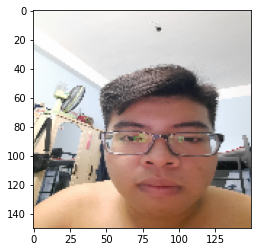

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/khuôn mặt/train/chánh/z3439938964509_98bbb03fdff6c67a0535bbe7c0077ecd.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==1):
    print("Người khác")
if(test==0):
    print("Thái Chánh")

Người khác


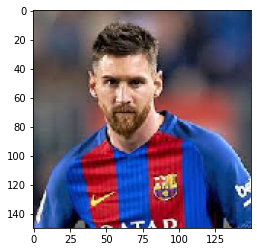

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/khuôn mặt/train/messi/images (4).jpeg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test ==1):
    print("Người khác")
if(test==0):
    print("Chánh")